In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
df=pd.read_csv('https://lukeb.co//python_csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
import ast 
df['job_skills'] = df['job_skills'].apply(
    lambda skill: ast.literal_eval(skill) if isinstance(skill, str) else skill
)

c:\Users\HP\anaconda3\envs\pn_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US=df[(df['job_title_short']== 'Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

In [ ]:
df_DA_US_exploded=df_DA_US.explode('job_skills')


,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [11]:
df_DA_US_skills=df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_US_skills=df_DA_US_skills.rename(columns={'count':'skill_count','median':'median_salary'})
df_DA_US_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


## we need percentage 

In [ ]:
df_DA_US

In [ ]:
DA_job_count=len(df_DA_US) # len provide us the numbers of job postings 
DA_job_count

4350

In [16]:
df_DA_US_skills['skill_percent']=df_DA_US_skills['skill_count']/DA_job_count *100
df_DA_US_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [ ]:
skill_percent=5 #Keep only rows where skill_percent > 5 %
df_DA_US_skills_high_demand=df_DA_US_skills[df_DA_US_skills['skill_percent']> skill_percent]
df_DA_US_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [19]:
from adjustText import adjust_text

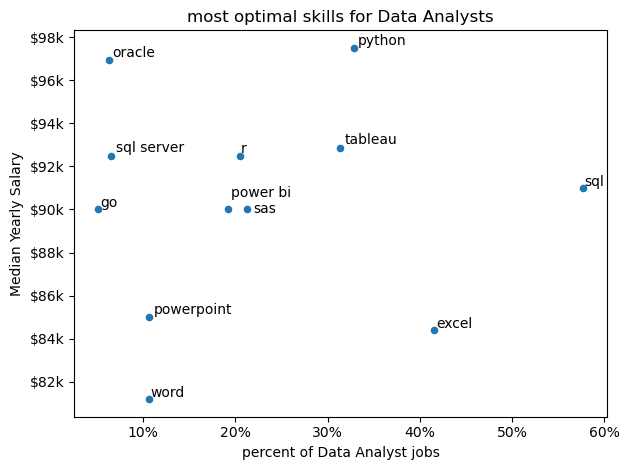

In [31]:
df_DA_US_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

tests=[]

for i, txt in enumerate(df_DA_US_skills_high_demand.index):
    tests.append(plt.text(df_DA_US_skills_high_demand['skill_percent'].iloc[i], 
                    df_DA_US_skills_high_demand['median_salary'].iloc[i], txt)) #this represnt list 

adjust_text(tests)
# adjust_text(tests,arrowprops =dict(arrowstyle="->", color="gray", lw=0.5))
ax=plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y ,pos:f'${int(y/1000)}k')) #we ignore pos in this case
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('percent of Data Analyst jobs')
plt.ylabel('Median Yearly Salary')
plt.title('most optimal skills for Data Analysts')
plt.tight_layout()
plt.show()

In [94]:
import seaborn as sns

## i want to color it by core technology

In [32]:
df['job_type_skills'].head(10)

0                                                  NaN
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [35]:
df_technology=df['job_type_skills'].copy()
df_technology=df_technology.drop_duplicates()
df_technology=df_technology.dropna()

In [ ]:
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value
#this condtion because we work with big data


In [80]:
for key,value in technology_dict.items():
    technology_dict[key]=list(set(value))
technology_dict ##this line ensure every skill appear once per technology so we need set to remove dublicates
# and need list later because set can not plot -- technology_dict[key]=list(set(value)) is same

{'analyst_tools': ['excel',
  'ssis',
  'dax',
  'msaccess',
  'qlik',
  'looker',
  'alteryx',
  'sheets',
  'outlook',
  'ssrs',
  'nuix',
  'splunk',
  'sas',
  'powerbi',
  'ms access',
  'sap',
  'power bi',
  'datarobot',
  'visio',
  'spreadsheet',
  'esquisse',
  'tableau',
  'word',
  'cognos',
  'microstrategy',
  'sharepoint',
  'powerpoint',
  'spss'],
 'programming': ['visual basic',
  'typescript',
  'c',
  'erlang',
  'mongo',
  'lua',
  'mongodb',
  'kotlin',
  'fortran',
  'crystal',
  'pascal',
  'f#',
  'javascript',
  'vb.net',
  'c#',
  'php',
  'go',
  'julia',
  'haskell',
  'cobol',
  'groovy',
  'clojure',
  'swift',
  'java',
  'bash',
  'objective-c',
  'delphi',
  'css',
  'no-sql',
  't-sql',
  'ruby',
  'lisp',
  'vba',
  'python',
  'dart',
  'shell',
  'rust',
  'sas',
  'solidity',
  'perl',
  'scala',
  'nosql',
  'elixir',
  'visualbasic',
  'html',
  'c++',
  'assembly',
  'r',
  'sass',
  'powershell',
  'matlab',
  'apl',
  'golang',
  'ocaml',
  '

In [89]:
df_technology=pd.DataFrame(list(technology_dict.items()),columns=['technology','skills'])
df_technology=df_technology.explode('skills')
df_technology
#It sees that each tuple has two items(key,value),
# so it puts the first item in the first column and the second item in the second column.

,technology,skills
0,analyst_tools,excel
0,analyst_tools,ssis
0,analyst_tools,dax
0,analyst_tools,msaccess
0,analyst_tools,qlik
...,...,...
9,sync,ringcentral
9,sync,slack
9,sync,twilio
9,sync,google chat


## now merge it to orginal Datafram

In [91]:
df_plot= df_DA_US_skills_high_demand.merge(df_technology,left_on='job_skills',right_on='skills')

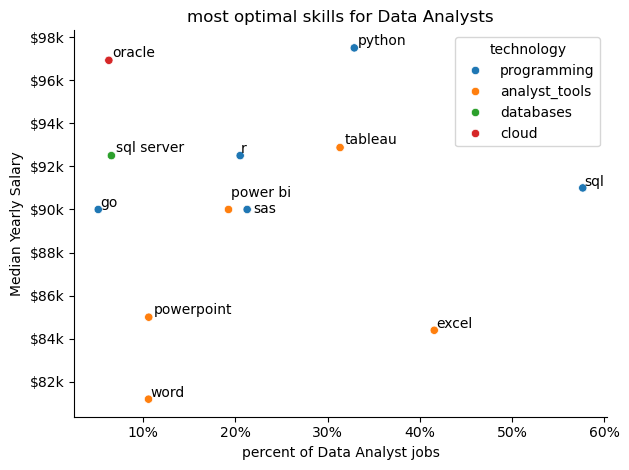

In [104]:

sns.scatterplot(data=df_plot, x='skill_percent',
y='median_salary',
hue='technology')
sns.reset_orig()
sns.despine()

tests=[]

for i, txt in enumerate(df_DA_US_skills_high_demand.index):
    tests.append(plt.text(df_DA_US_skills_high_demand['skill_percent'].iloc[i], 
                    df_DA_US_skills_high_demand['median_salary'].iloc[i], txt)) #this represnt list 

adjust_text(tests)
# adjust_text(tests,arrowprops =dict(arrowstyle="->", color="gray", lw=0.5))
ax=plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y ,pos:f'${int(y/1000)}k')) #we ignore pos in this case
from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('percent of Data Analyst jobs')
plt.ylabel('Median Yearly Salary')
plt.title('most optimal skills for Data Analysts')
plt.Figure(figsize=(12,12))
plt.tight_layout()
plt.show()

## notes

In [ ]:
# percent = (small_number / big_number) * 100

"""
| Condition                    | What happens                             |
| ---------------------------- | ---------------------------------------- |
| `if key in technology_dict:` | Key already exists → add new items to it |
| `else:`                      | Key doesn’t exist → create it first      |
"""

"""
At the start: else is needed to create each new key the first time it appears.

After that: only the if part runs to add more values to the existing keys.
in other word:“After all keys are added once, the else part doesn’t do anything anymore.”
"""
"""
Instead of many small dictionaries (one per row),technology_dict makes one big
merged dictionary containing all skills grouped by type.
"""
"""for key,value in technology_dict.items(): technology_dict[key]=list(set(value))
this line removes duplicate values in each list inside technology_dict.then return value to list
"""
"""
we use list(technology_dict.items()) to turn each (key, value) pair into a row,
and then we manually name the two columns.
"""
"""
df_DA_US_skills_high_demand.merge(df_technology,left_on='job_skills',right_on='skills')
on= → same column name in both DataFrames
left_on, right_on → different column names in the two DataFrames

pandas keeps the right column (to avoid duplicates)
"""

'\non= → same column name in both DataFrames\n\nleft_on, right_on → different column names in the two DataFrames\n'